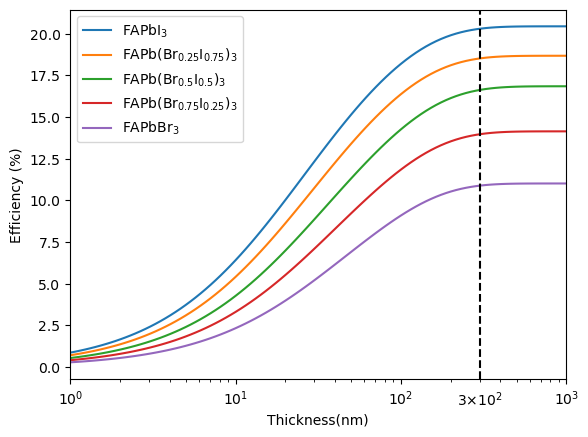

In [1]:
import pymatgen.analysis.solar.slme as slme
import numpy as np
import matplotlib.pyplot as plt

thickness = np.logspace(-9, -6, 100, endpoint=True)
thickness_nm = thickness*1000000000

materials = {
    "FAPbI$_3$": {
        "dir" : 2.116, 
        "indir" :2.116, 
        "folder": "./Br0I12/",
    },
    #"Br1I11": {
    #    "dir": 2.152,
    #    "indir": 2.152,
    #    "folder": "./Br1I11/",
    #},
    #"Br2I10": {
    #    "dir": 2.175,
    #    "indir": 2.175, 
    #    "folder": "./Br2I10/",
    #},
    "FAPb(Br$_{0.25}$I$_{0.75}$)$_3$": {
        "dir": 2.200, 
        "indir": 2.200,
        "folder": "./Br3I9/",
    },
    #"Br4I8": {
    #    "dir": 2.277,
    #    "indir": 2.277,
    #    "folder": "./Br4I8/",
    #},
    #"Br5I7": {
    #    "dir": 2.246,
    #    "indir": 2.246,
    #    "folder": "./Br5I7/",
    #},
    "FAPb(Br$_{0.5}$I$_{0.5}$)$_3$": {
        "dir": 2.286,
        "indir": 2.286,
        "folder": "./Br6I6/",
    },
    #"Br7I5": {
    #    "dir": 2.350,
    #    "indir": 2.350,
    #    "folder": "./Br7I5/",
    #},
    #"Br8I4": {
    #    "dir": 2.383,
    #    "indir": 2.383,
    #    "folder": "./Br8I4/",
    #},
    "FAPb(Br$_{0.75}$I$_{0.25}$)$_3$": {
        "dir": 2.422,
        "indir": 2.422,
        "folder": "./Br9I3/",
    },
    #"Br10I2": {
    #    "dir": 2.472,
    #    "indir": 2.472,
    #    "folder": "./Br10I2/",
    #},
    #"Br11I1": {
    #    "dir": 2.531,
    #    "indir": 2.531,
    #    "folder": "./Br11I1/",
    #},
    "FAPbBr$_3$": {
        "dir": 2.587,
        "indir": 2.587,
        "folder": "./Br12I0/",
    },
}

for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    effSlm = []
    for i in thickness:
        eff = data = slme.slme(energy,alpha_cm,material_data["dir"],material_data["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
        effSlm.append(eff)
    plt.plot(thickness_nm, effSlm, label = material)

plt.axvline(x=300, linestyle='--', color = 'black')
plt.annotate(r'3$\times$10$^2$', xy=(300, 0), xytext=(300, -2.3), ha='center', color='black')
plt.xscale('log')
plt.margins(x=0)
plt.xlabel("Thickness(nm)")
plt.ylabel("Efficiency (%)")
plt.legend()

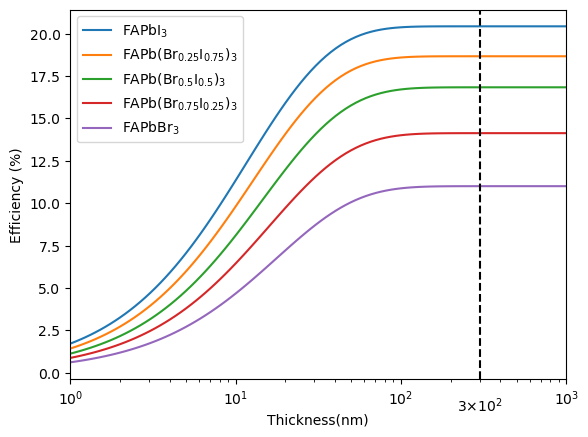

In [2]:
for material, material_data in materials.items():
    data = np.loadtxt(material_data["folder"] + 'absorption.dat', delimiter=' ')
    energy = data[:,0]
    alpha_cm = data[:,1]
    ediff = energy[1] - energy[0] #foot length of energy
    ediff_soc = 0.498475
    shiftnum = round(ediff_soc / ediff)
    alpha_cm = alpha_cm[shiftnum:]
    energy = energy[:-shiftnum]
    effSlm = []
    for i in thickness:
        eff = data = slme.slme(energy,alpha_cm,material_data["dir"],material_data["indir"],thickness=i,absorbance_in_inverse_centimeters=True)
        effSlm.append(eff)
    plt.plot(thickness_nm, effSlm, label = material)

plt.axvline(x=300, linestyle='--', color = 'black')
plt.annotate(r'3$\times$10$^2$', xy=(300, 0), xytext=(300, -2.3), ha='center', color='black')
plt.xscale('log')
plt.margins(x=0)
plt.xlabel("Thickness(nm)")
plt.ylabel("Efficiency (%)")
plt.legend()